# Data Analysis of Airbnb hosts in Seattle
As more travellers choose Airbnb as their primary lodging provider, Airbnb has successfully disrupted the traditional hospitality industry. Since its founding in 2008, Airbnb has experienced exponential growth, with the number of rentals listed on its website increasing at an exponential rate each year.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

### Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day


<img src="future.jpg" width=900 height=300 />

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
#import test1 as t
import seaborn as sns
%matplotlib inline


In [12]:
pd.set_option("display.max_columns", None)

In [5]:
import os
os.listdir()

['calendar.csv',
 'listings.csv',
 'reviews.csv',
 'Seattle Airbnb Data Analysis.ipynb']

In [38]:
calendar=pd.read_csv('calendar.csv')
listings=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')


<img src="look.jpg" width=900 height=200 />

In [5]:
calendar.shape, listings.shape,reviews.shape

((1393570, 4), (3818, 92), (84849, 6))

In [6]:
calendar.head(2)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00

In [7]:
reviews.head(2)

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...

In [8]:
listings.head(2)

id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                      xl_picture_url  host_id  \
0                                                NaN   956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...  5177328   

                                    host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1  https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...         Queen Anne   
1  https://a0.muscache.com/ac/users/5177328/profi...         Queen Anne   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0               ['email', 'phone', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'linkedin', 're...                    t   

  host_identity_verified                                             street  \
0                      t      Gilman Dr W, Seattle, WA 98119, United States   
1                      t  7th Avenue West, Seattle, WA 98119, United States   

  neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city  \
0    Quee


<img src="cleaning.jpeg" width=900 height=200 />

## First cleaning the "listings.csv" file

In [389]:
columns_to_keep=['id',
 'host_location',
  'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city','price',
 'state',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 ##
 'room_type', 'bed_type',##
 'accommodates',
 'bathrooms',
 'bedrooms',
 'amenities',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_location',
 'cancellation_policy']

In [390]:
listings=pd.read_csv('listings.csv')

In [404]:
def clean_listings(df):
    # 1-using only the required columns
    df=df[columns_to_keep]
    # 2-cleaning and converting ['cleaning_fee','extra_people', 'price'] to float
    change_to_float_columns=['cleaning_fee','extra_people', 'price']
    for col in change_to_float_columns:
        df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
    # 3- replacing null values by mean for some features
    fill_mean_columns=['cleaning_fee','review_scores_rating','review_scores_cleanliness','review_scores_location']
    
    for col in fill_mean_columns:
        df[col]=df[col].fillna(df[col].mean())
    outlier_columns=['price', 'extra_people', 'cleaning_fee','bathrooms','bedrooms']
    for col in outlier_columns:
        df[col]=np.where(df[col]>df[col].quantile(0.80),df[col].quantile(0.80),df[col])

    # 4- dropping small number of null values for some numeric columns
    df.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

    # 5- dropping small number of null values for some object columns

    df.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)
    
    # 6- Adding a column ['amenities_number'] that shows the quantity of amenties
    df['amenities']=df['amenities'].str.strip('{}').str.replace('"','').str.split(',')
    h=[]
    for i in df.amenities:
        h.append(len(i))
    df['amenities_number']=h

    # 7- Dropping ['id' ,'amenties'] columns
    df.drop(columns=['id','amenities'],inplace=True)

    # 8-making dummy variables for categorical data
    categorical_features=df.select_dtypes(include=['object'])
    for col in categorical_features:
        df=pd.concat([df.drop(col,axis=1)  , pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    
    # 9- Getting feature matrix X and Target matrix y
    X=df.drop(['price'],axis=1)
    y=df[['price']]
    
    return X,y,df


## Cleaning "reviews.csv"

In [405]:
reviews.isnull().mean().sort_values(ascending=False)

comments         0.0
reviewer_name    0.0
reviewer_id      0.0
date             0.0
id               0.0
listing_id       0.0
dtype: float64

In [397]:
reviews.dropna(inplace=True)

In [409]:
reviews.describe()

listing_id            id   reviewer_id
count  8.483100e+04  8.483100e+04  8.483100e+04
mean   3.005270e+06  3.058980e+07  1.701347e+07
std    2.472827e+06  1.636519e+07  1.353705e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725821e+07  5.053141e+06
50%    2.488228e+06  3.228949e+07  1.413622e+07
75%    4.694479e+06  4.457748e+07  2.762404e+07
max    1.024814e+07  5.873651e+07  5.281274e+07

## Cleaning "calender.csv"

In [400]:
calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [402]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [403]:
calendar.head(3)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN

In [407]:
calendar['price']=calendar['price'].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)

In [408]:
calendar.describe()

listing_id          price
count  1.393570e+06  934542.000000
mean   5.550111e+06     137.944859
std    2.962274e+06     105.062870
min    3.335000e+03      10.000000
25%    3.258213e+06      75.000000
50%    6.118244e+06     109.000000
75%    8.035212e+06     160.000000
max    1.034016e+07    1650.000000

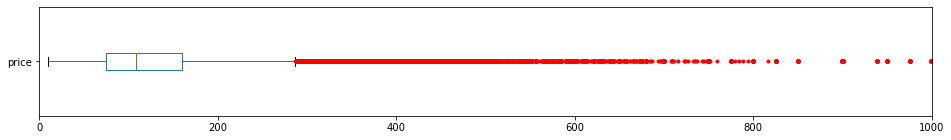

In [410]:
## we see some outliers in 'price'. Let us visualize
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
calendar['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [429]:
calendar.drop(calendar[ (calendar['price'] > 250) ].index, axis=0, inplace=True)


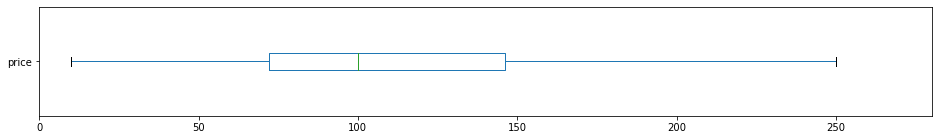

In [430]:
calendar['price'].plot(kind='box', xlim=(0,280), vert=False, flierprops=red_square, figsize=(16,2));

In [436]:
def clean_listings_with_cat(df):
    # 1-using only the required columns
    df=df[columns_to_keep]
    # 2-cleaning and converting ['cleaning_fee','extra_people', 'price'] to float
    change_to_float_columns=['cleaning_fee','extra_people', 'price']
    for col in change_to_float_columns:
        df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
    # 3- replacing null values by mean for some features
    fill_mean_columns=['cleaning_fee','review_scores_rating','review_scores_cleanliness','review_scores_location']
    
    for col in fill_mean_columns:
        df[col]=df[col].fillna(df[col].mean())
    outlier_columns=['price', 'extra_people', 'cleaning_fee','bathrooms','bedrooms']
    for col in outlier_columns:
        df[col]=np.where(df[col]>df[col].quantile(0.80),df[col].quantile(0.80),df[col])

    # 4- dropping small number of null values for some numeric columns
    df.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)

    # 5- dropping small number of null values for some object columns

    df.dropna(subset=['host_neighbourhood','host_location','host_has_profile_pic','host_identity_verified','property_type','neighbourhood'], inplace=True)
    
    # 6- Adding a column ['amenities_number'] that shows the quantity of amenties
    df['amenities']=df['amenities'].str.strip('{}').str.replace('"','').str.split(',')
    h=[]
    for i in df.amenities:
        h.append(len(i))
    df['amenities_number']=h

    # 7- Dropping ['id' ,'amenties'] columns
    df.drop(columns=['id','amenities'],inplace=True)

    # # 8-making dummy variables for categorical data
    # categorical_features=df.select_dtypes(include=['object'])
    # for col in categorical_features:
    #     df=pd.concat([df.drop(col,axis=1)  , pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    
    # # 9- Getting feature matrix X and Target matrix y
    # X=df.drop(['price'],axis=1)
    # y=df[['price']]
    
    return df


In [437]:
df=clean_listings_with_cat(listings)

<ipython-input-436-42df16fc1263>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)
<ipython-input-436-42df16fc1263>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())
<ipython-input-436-42df16fc1263>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [438]:
df.head(2)

host_location host_neighbourhood host_has_profile_pic  \
0  Seattle, Washington, United States         Queen Anne                    t   
1  Seattle, Washington, United States         Queen Anne                    t   

  host_identity_verified neighbourhood neighbourhood_cleansed  \
0                      t    Queen Anne        West Queen Anne   
1                      t    Queen Anne        West Queen Anne   

  neighbourhood_group_cleansed     city  price state   latitude   longitude  \
0                   Queen Anne  Seattle   85.0    WA  47.636289 -122.371025   
1                   Queen Anne  Seattle  150.0    WA  47.639123 -122.365666   

  is_location_exact property_type        room_type  bed_type  accommodates  \
0                 t     Apartment  Entire home/apt  Real Bed             4   
1                 t     Apartment  Entire home/apt  Real Bed             4   

   bathrooms  bedrooms  cleaning_fee  guests_included  extra_people  \
0        1.0       1.0     61.710904                2           5.0   
1        1.0       1.0     40.000000                1           0.0   

   minimum_nights  maximum_nights  review_scores_rating  \
0               1             365                  95.0   
1               2              90                  96.0   

   review_scores_cleanliness  review_scores_location cancellation_policy  \
0                       10.0                     9.0            moderate   
1                       10.0                    10.0              strict   

   amenities_number  
0                10  
1                16

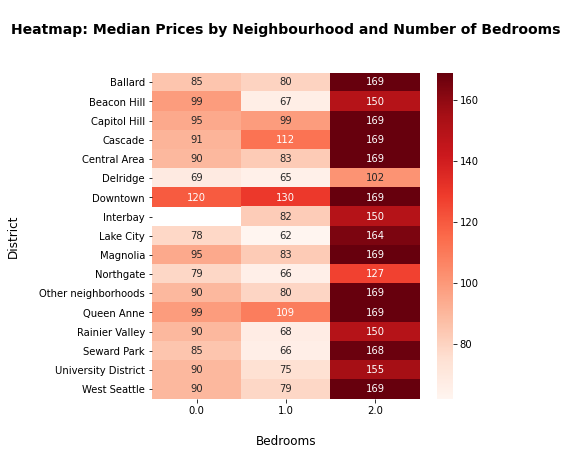

In [439]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

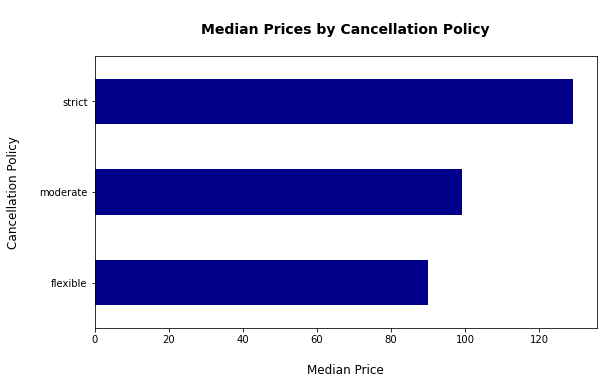

In [442]:
df_grouped = pd.DataFrame(df.groupby(['cancellation_policy'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='cancellation_policy', y='price', 
                figsize=(9,5), legend=False, color='darkblue')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('Cancellation Policy\n', fontsize=12)
plt.title('\nMedian Prices by Cancellation Policy\n', fontsize=14, fontweight='bold');

# Number of Hosts per District

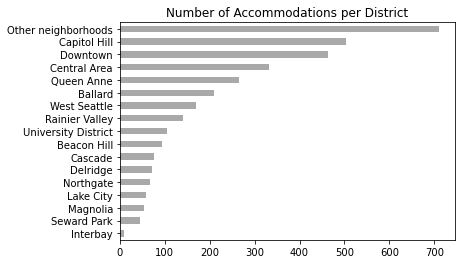

In [444]:
df['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

# What is the price change according to neighborhood?

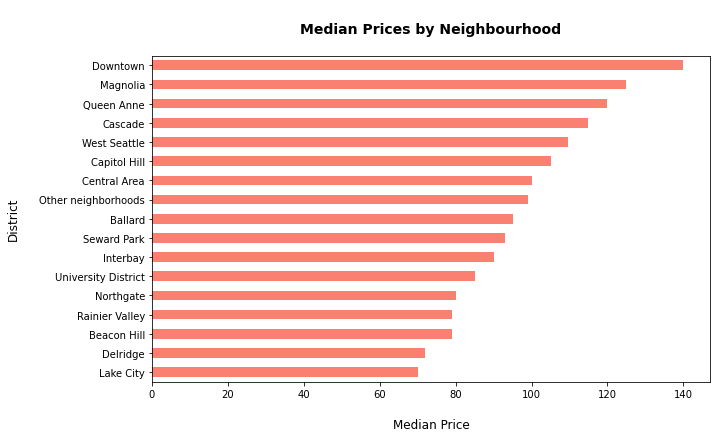

In [443]:
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

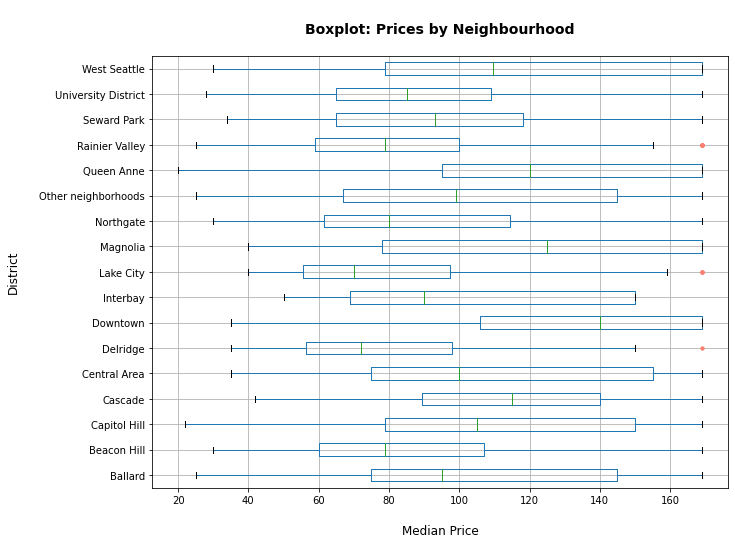

In [445]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df.boxplot(column='price', by='neighbourhood_group_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');

# Predicting Price of host

In [392]:
X,y,df=clean_listings(listings)

<ipython-input-391-a61c0c1bab26>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float).copy()
<ipython-input-391-a61c0c1bab26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(df[col].mean())
<ipython-input-391-a61c0c1bab26>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [393]:
abs(X.sum()).sort_values(ascending=False)

maximum_nights                                             2.624514e+06
longitude                                                  4.125065e+05
review_scores_rating                                       3.189646e+05
cleaning_fee                                               1.767972e+05
latitude                                                   1.606061e+05
                                                               ...     
host_location_Santa Fe, New Mexico, United States          1.000000e+00
host_location_Santa Monica, California, United States      1.000000e+00
host_neighbourhood_Northwest District                      1.000000e+00
host_location_Seattle WA and Portland OR                   1.000000e+00
host_location_West Hollywood, California, United States    1.000000e+00
Length: 429, dtype: float64

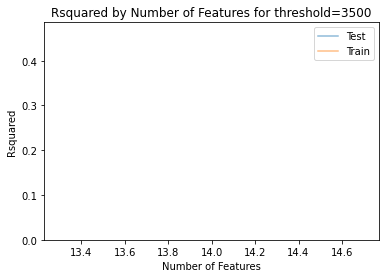

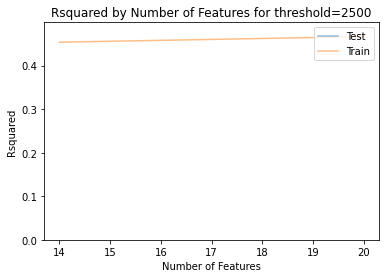

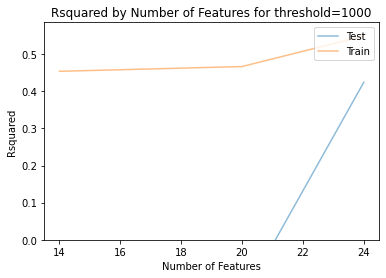

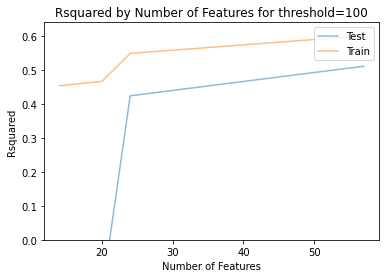

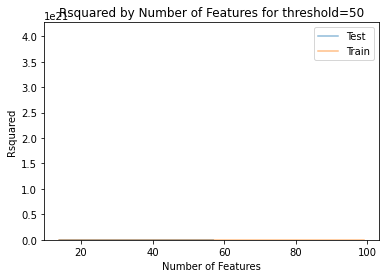

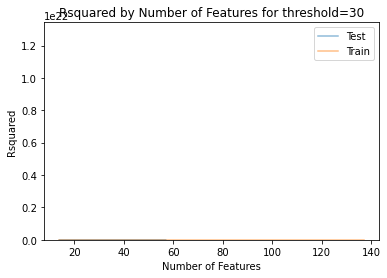

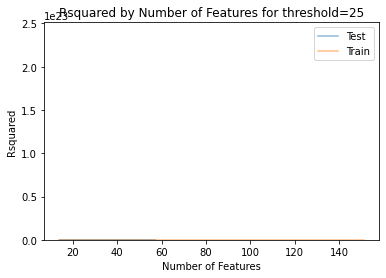

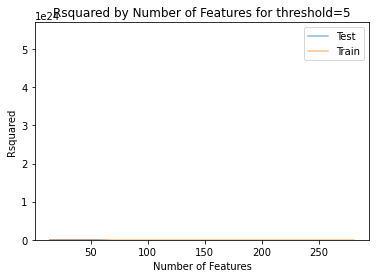

In [371]:
cutoffs = [3500, 2500, 1000, 100, 50, 30, 25,5]
r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
for cutoff in cutoffs:

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((abs(X.sum()) > cutoff) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)

    #fit the model and obtain pred response
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #append the r2 value from the test set
    r2_scores_test.append(r2_score(y_test, y_test_preds))
    r2_scores_train.append(r2_score(y_train, y_train_preds))
    results[str(cutoff)] = r2_score(y_test, y_test_preds)

# if plot:
    plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
    plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
    plt.xlabel('Number of Features')
    plt.ylabel('Rsquared')
    plt.title('Rsquared by Number of Features for threshold=' + str(cutoff))
    plt.legend(loc=1)

    plt.ylim(bottom=0) 
    plt.show()

In [385]:
best_cutoff = max(results, key=results.get)
best_cutoff 

'100'

In [386]:
# so we reduce the feature matrix X according to non zero values threshold of >50
reduce_X = X.iloc[:, np.where((X.sum() > 100) == True)[0]]

In [387]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(reduce_X , y, test_size = 0.3, random_state=52)

#fit the model
lm_model = LinearRegression(normalize =True)
#lm_model1 = LinearRegression(normalize =True)


In [388]:
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [384]:
len(X_train),len(y_train),len(X_test),len(new_reduce_X),len(lm_model.coef_)

(2360, 2360, 1012, 3372, 1)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
Feature 0: 0.107718
Feature 1: 0.119454
Feature 2: 0.311199
Feature 3: 0.100368
Feature 4: 0.243777
Feature 5: 0.268972
Feature 6: 0.138231
Feature 7: 0.043827
Feature 8: 0.060139
Feature 9: 0.032523
Feature 10: 0.048636
Feature 11: 0.031884
Feature 12: 0.015312
Feature 13: 0.057177
Feature 14: 0.010412
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.013902
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.014389
Feature 22: 0.007977
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.015264
Feature 26: 0.000000
Feature 27: 0.011662
Feature 28: 0.005196
Feature 29: 0.015425
Feature 30: 0.013638
Feature 31: 0.012830
Feature 32: 0.000000
Feature 33: 0.000000
Feature 34: 0.014857
Feature 35: 0.000000
Feature 36: 0.0

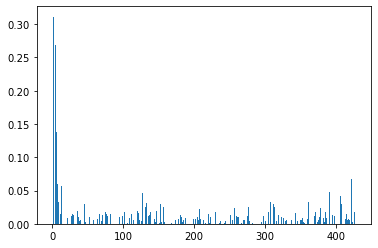

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [355]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [357]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=60)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# # load the dataset
# X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# # split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\New User\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
MAE: 20.005


In [259]:
## Previous operation of getting optimal cut off values for Non zero dummy categorical can be combined as a single function as shown below
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [225]:
ans.amenities

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3796, dtype: object

In [216]:
df=ans

In [230]:
h=[]
for i in df.amenities:
    h.append(len(i))
df['amneties_number']=h

In [231]:
df['amneties_number']

0       114
1       243
2       291
3       197
4       181
       ... 
3813    221
3814    238
3815    273
3816    167
3817    314
Name: amneties_number, Length: 3796, dtype: int64

In [201]:
a='{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [206]:
a.strip('{}')

'TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer'

In [209]:
from collections import Counter

In [208]:

a.strip('{}').replace('"','').split(',')

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [194]:
ans.select_dtypes(include=['float','int']).isnull().mean().sort_values(ascending=False)

review_scores_location       0.0
review_scores_cleanliness    0.0
review_scores_rating         0.0
extra_people                 0.0
cleaning_fee                 0.0
bedrooms                     0.0
bathrooms                    0.0
longitude                    0.0
latitude                     0.0
price                        0.0
dtype: float64

In [180]:
df=ans

In [184]:
dropna_columns=['bathrooms','bedrooms']
for col in dropna_columns:
    df[col].dropna(how='any',inplace=True)

E:\anaconda\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [185]:
df.select_dtypes(include=['object']).isnull().mean().sort_values(ascending=False)

bedrooms                        1.000000
bathrooms                       1.000000
neighbourhood                   0.108958
host_neighbourhood              0.078575
host_location                   0.002095
host_identity_verified          0.000524
host_has_profile_pic            0.000524
property_type                   0.000262
cancellation_policy             0.000000
amenities                       0.000000
is_location_exact               0.000000
state                           0.000000
city                            0.000000
neighbourhood_group_cleansed    0.000000
neighbourhood_cleansed          0.000000
dtype: float64

In [102]:
ans.cleaning_fee=np.where(ans.cleaning_fee>ans.cleaning_fee.quantile(0.80),ans.cleaning_fee.quantile(0.80),ans.cleaning_fee)

E:\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [105]:
ans.extra_people=np.where(ans.extra_people>ans.extra_people.quantile(0.80),ans.extra_people.quantile(0.80),ans.extra_people)

E:\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [106]:
ans.extra_people.describe()

count    3818.000000
mean        7.579361
std         8.743971
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        20.000000
Name: extra_people, dtype: float64

In [47]:
change_to_float_columns=['cleaning_fee','extra_people', 'host_response_rate','host_acceptance_rate','price']
for col in change_to_float_columns:
    listings[col]=listings[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)

<ipython-input-47-9799c714f336>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings[col]=listings[col].str.replace("$","").str.replace(",","").str.replace("%","").astype(float)


In [48]:
listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [19]:
columns_to_keep = ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']
len(columns_to_keep)

24

In [73]:
listings_reduced=listings[columns_to_keep]
listings_reduced.shape

(3818, 39)

In [56]:
columns_to_keep=['host_since',
       'host_location',  'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_neighbourhood',
        'host_total_listings_count',
       'host_verifications',  'host_identity_verified',
         'neighbourhood_group_cleansed',  
         'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights' 'number_of_reviews',
        'review_scores_rating','review_scores_cleanliness',       
       'review_scores_location', 'review_scores_value', 
       'license','instant_bookable',
       'cancellation_policy']
reduced_listings=listings[listings[columns_to_keep]]
reduced_listings.head(3)

KeyError: "['maximum_nightsnumber_of_reviews'] not in index"

In [52]:
listings['market'].value_counts()

Seattle    3818
Name: market, dtype: int64

In [11]:
reviews.head(3)

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...

In [12]:
calendar.head(3)

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN

In [19]:
comment=['good','great','loved', 'clean','wonderful','nice','clean']
good_reviews=[]
for i in reviews.comments:
    if i in comment:
        good_reviews.append(i)

In [20]:
good_reviews

['great', 'wonderful', 'good', 'nice']

In [13]:
listings.head(3)

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  

[3 rows x 92 columns]

In [10]:
# which columns have no missing values in calendar
calendar.columns[calendar.notnull().all()]

Index(['listing_id', 'date', 'available'], dtype='object')

In [ ]:
# which columns have no missing values in calendar
calendar.columns[calendar.notnull().all()]

In [1]:
# which columns have no missing values
calendar.listing_id.isnull().any().count()

NameError: name 'calendar' is not defined

In [7]:
listings.head(3)

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  

[3 rows x 92 columns]

In [8]:
reviews.head(3)

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...

In [10]:
# first check the missing values
calendar.isna().value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [143]:
df2[df2['Column']=='Professional']

Column                                    Question
1  Professional  Which of the following best describes you?

In [180]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column']==column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [181]:
get_description('CousinEducation')

"Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which 

In [175]:
df['CousinEducation'].value_counts()

Take online courses; Buy books and work through the exercises                                         711
Take online courses                                                                                   551
None of these                                                                                         523
Take online courses; Part-time/evening courses; Buy books and work through the exercises              479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises    465
                                                                                                     ... 
Return to college; Participate in hackathons; Conferences/meet-ups; Other                               1
Master's degree; Take online courses; Bootcamp; Other                                                   1
Master's degree; Participate in hackathons; Participate in online coding competitions; Other            1
Return to college; Contribute to open source; 

In [49]:
df=results

In [63]:
df.columns[df.notnull().all()].tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']

In [67]:
df.notnull().all().sum()

7

In [83]:
df.shape

(51392, 154)

In [85]:
results.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,     0,  8551,  7384,
       12470, 12569,   247, 10502, 50418, 15267, 40696, 49839, 46502,
        8697, 11016, 50469, 50471, 50469, 50475, 50464, 50457, 50470,
       50462,   384, 20099, 20158, 20088, 20208, 20152, 20489, 20371,
       20335, 20408, 20345, 20378, 20506, 20427, 20690, 20421, 20582,
       20457, 18012, 30792, 18682, 29262, 29245, 29256, 29269, 29203,
       29209, 29246, 29388, 29419, 29372, 29406, 29394, 29414, 29395,
       29369, 21157,  9346, 26673, 28931, 27655, 22750, 22698, 22753,
       22796, 22775, 22839, 22839, 22729, 22774, 22847, 29984, 38005,
       12541, 28037, 21038, 24657, 48790, 27824, 14696, 14767, 17621,
       31163, 28061, 21940, 26283, 22278, 23508, 15562, 14935, 25621,
       20662, 21831, 21751, 21773, 21993, 21627, 22042, 21752, 21935,
       25920, 21667, 21665, 21656, 21721, 21703, 21701, 29734, 29733,
       29808, 29791, 29799, 29779, 29776, 29797, 29847, 29806, 29814,
       14460, 14800,

In [89]:
set(df.columns[df.notnull().all()])

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [77]:
results.isnull().sum().values>=75/100*51392

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
set(df.columns[df.isnull().sum().values>=75/100*51392])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [95]:
set(df.columns[df.isnull().mean()>=0.75]) ==set(df.columns[df.isnull().sum().values>=75/100*51392])

True

In [90]:
set(df.columns[df.isnull().mean() > 0.75])

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [103]:
import matplotlib.pyplot as plt

In [112]:
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

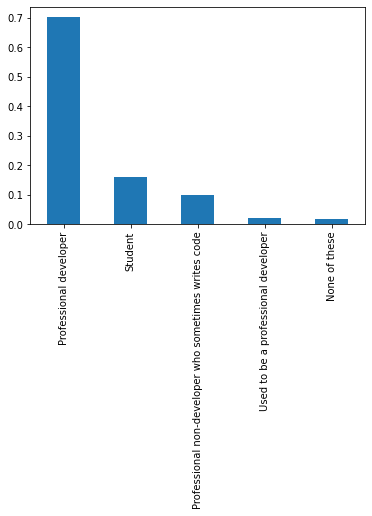

In [113]:
(df['Professional'].value_counts()/df.shape[0]).plot(kind='bar')

In [114]:
df.head(2)

Respondent Professional ProgramHobby         Country      University  \
0           1      Student    Yes, both   United States              No   
1           2      Student    Yes, both  United Kingdom  Yes, full-time   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   

                             MajorUndergrad  \
0                                       NaN   
1  Computer science or software engineering   

                              HomeRemote         CompanySize  ...  \
0                                    NaN                 NaN  ...   
1  More than half, but not all, the time  20 to 99 employees  ...   

  StackOverflowMakeMoney Gender HighestEducationParents  \
0      Strongly disagree   Male             High school   
1      Strongly disagree   Male       A master's degree   

                           Race         SurveyLong QuestionsInteresting  \
0  White or of European descent  Strongly disagree       Strongly agree   
1  White or of European descent     Somewhat agree       Somewhat agree   

  QuestionsConfusing InterestedAnswers  Salary  ExpectedSalary  
0           Disagree    Strongly agree     NaN             NaN  
1           Disagree    Strongly agree     NaN         37500.0  

[2 rows x 154 columns]

In [116]:
df['Country'].value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
                                  ...  
Monaco                                1
Guam                                  1
Mali                                  1
S. Georgia & S. Sandwich Isls.        1
Guinea                                1
Name: Country, Length: 201, dtype: int64

In [61]:
df[[col for col in df.columns if df[col].notnull().all()]].columns

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation']

In [29]:
pd.notnull(results).any().count()

154

In [31]:
booll=pd.notnull(results)

In [35]:
results.columns[results.notnull().any()]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)